Alicia Kincaid


# Question One
i.) This is the "design from specifications approach." With this method, because the problem is well specified, your system does not need to see the coins before it creates a function for classifying the coins. Because the data does not play a roll in this classification, it is not machine learning.

ii.) This is "supervised learning." With this method, the training data is given explicit examples of what the output should be for an input. From there, it creates a function for classifying the future coins. Because the data is used to create the function for classification, this is machine learning.

iii.) This is a "reinforcement learning" model.  The program creates a function to classify the coins, the refines it based on the correctness of the individual coin classifications. Because the data is used to create the function for classification, this is machine learning.

# Question Two

## a.i
The two classes are not equally distributed; there are more benign cells than malignant

In [6]:
count_classes(bc_data_train)

Train Class Malignant:  153
Train Class Benign:  330


## a.ii
The features are not equally distributed

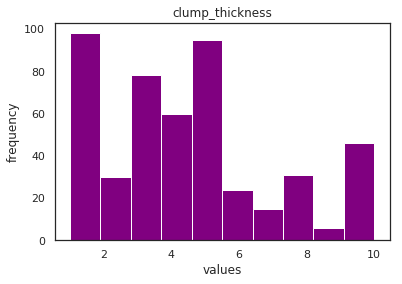

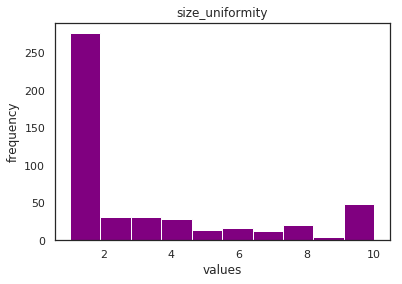

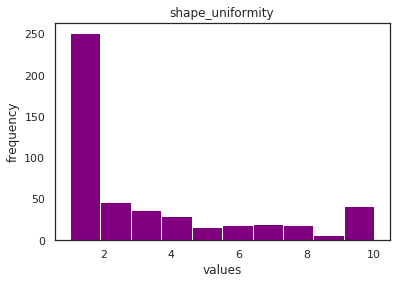

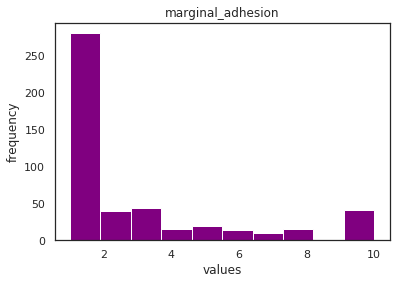

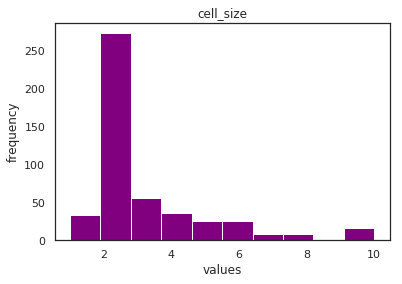

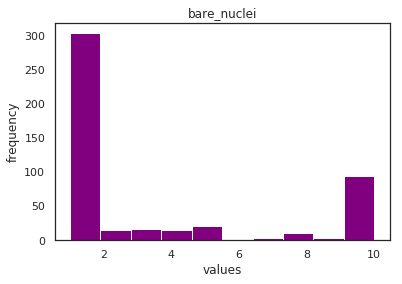

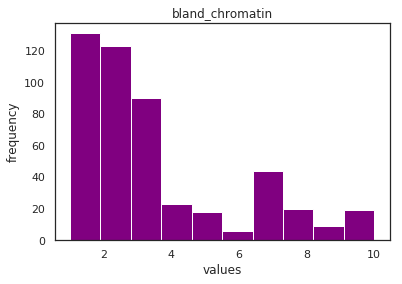

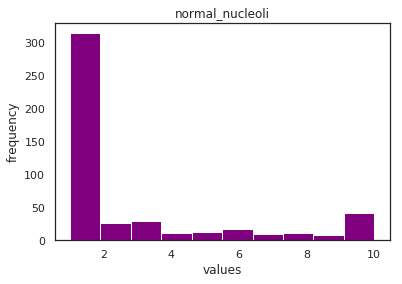

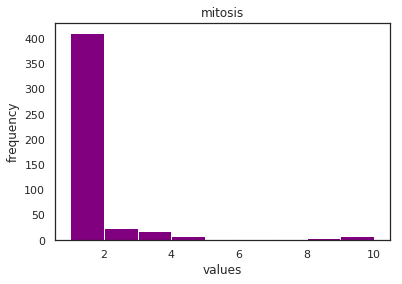

In [7]:
loop_through_columns(bc_data_train)

## a.iii
It appears the benign cells are generally clustered at the bottom left. I think for most you could have a reasonable line of separation.

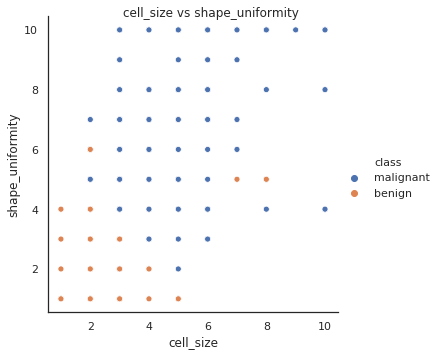

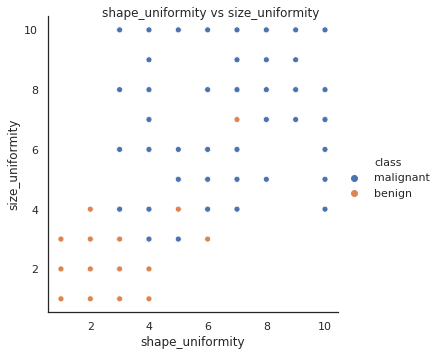

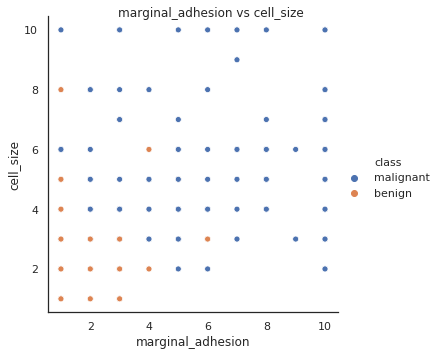

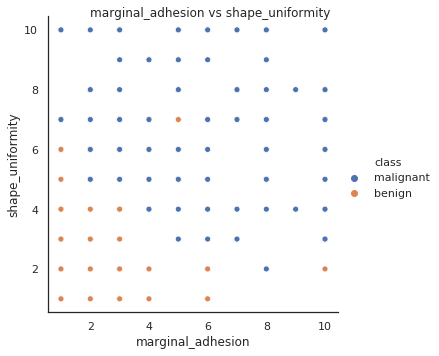

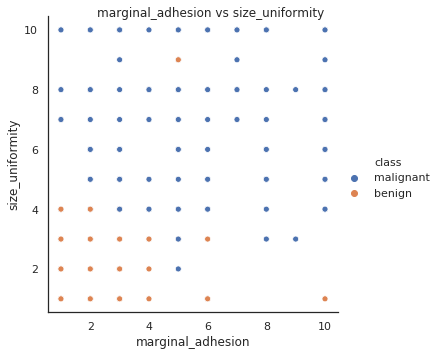

In [8]:
unique_column_selection(bc_data_train)

## b.i

In [9]:
dev_accuracy_list, dev_baccuracy_list = generate_kNN(training_data, \
        training_labels, dev_data, dev_labels, euclidian_distance)

## b.ii
Based on the data, the best Hyperparameter for both $K_1$ and $K_2$ is 3 (shown in our line graph as the second element). The difference between all the k's looks extreme because our percent accuracy axis is scaled from 97% to 99%, however, as can be seen in our printed accuracy lists the amounts are generally similar.

I think the smaller k values have better accuracy because of how many more benign cells there are than malignant ones... If you look at larger amounts, the actually closer points will be drowned out by the ones with the greatest quantity.


In [10]:
print(dev_accuracy_list)
print(dev_baccuracy_list)

[0.97, 0.99, 0.98, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]
[0.9708557255064076, 0.9915254237288136, 0.9793303017775941, 0.9671351798263745, 0.9671351798263745, 0.9671351798263745, 0.9671351798263745, 0.9671351798263745, 0.9671351798263745, 0.9671351798263745]


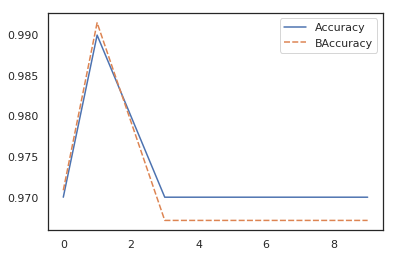

In [11]:
pre_dataframe = {'Accuracy':dev_accuracy_list, 'BAccuracy':dev_baccuracy_list}
dataframe = pd.DataFrame(pre_dataframe)
graph = sns.lineplot(data=dataframe)

## b.iii
The accuracies for our test data at $K_1$ and $K_2$ were both less than for the dev data, however, upon graphin out all the accuracies it is clear that we still selected the best (or one of the best) options.

In [12]:
test_accuracy_k1, test_baccuracy_k2 = generate_kNN(training_data, \
        training_labels, test_data, test_labels, euclidian_distance)

In [13]:
print("K1 accuracy: ", test_accuracy_k1[1])
print("K2 baccuracy: ", test_baccuracy_k2[1])

K1 accuracy:  0.95
K2 baccuracy:  0.9324324324324325


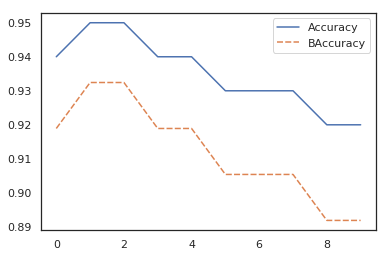

In [14]:
pre_dataframe = {'Accuracy':test_accuracy_k1, 'BAccuracy':test_baccuracy_k2}
dataframe = pd.DataFrame(pre_dataframe)
graph = sns.lineplot(data=dataframe)

In [1]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import pandas as pd
import numpy as np
import random
import math
import csv

In [2]:
#The titles of our columns
column_titles = ['clump_thickness', 'size_uniformity', 'shape_uniformity', 
                 'marginal_adhesion', 'cell_size', 'bare_nuclei', 'bland_chromatin', 
                 'normal_nucleoli', 'mitosis', 
                'class']

In [3]:
#import data sets with header
bc_data_train = pd.read_csv('hw1_question2_train.csv', names=column_titles)
bc_data_test = pd.read_csv('hw1_question2_test.csv', names=column_titles)
bc_data_dev = pd.read_csv('hw1_question2_dev.csv', names=column_titles)

training_labels = bc_data_train['class']
training_data = bc_data_train.drop('class', axis=1)
test_labels = bc_data_test['class']
test_data = bc_data_test.drop('class', axis=1)
dev_labels = bc_data_dev['class']
dev_data = bc_data_dev.drop('class', axis=1)

In [5]:
bc_data_train.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,10,10,9,3,7,5,3,5,1,4
1,1,1,1,1,1,1,3,1,1,2
2,1,1,1,1,1,1,3,1,1,2
3,5,1,1,1,1,1,3,1,1,2
4,8,10,10,10,5,10,8,10,6,4


## Functions for part a

In [4]:
#Counts the number of malignant/benign cells in a data set
def count_classes(input_data):
    class_list = input_data['class'].tolist()
    
    malignant_counter = 0
    benign_counter = 0
    
    for element in class_list:
        if element is 4:
            malignant_counter +=1
        else:
            benign_counter += 1
    
    print("Train Class Malignant: ", malignant_counter)
    print("Train Class Benign: ", benign_counter)


#Plots the histogram
def create_histogram(input_data, column_name):
    list_to_plot = input_data[column_name].tolist()
    size = len(set(list_to_plot))
    plt.title(column_name)
    plt.ylabel('frequency')
    plt.xlabel('values')
    plt.hist(list_to_plot, size, color="purple")
    plt.show()

    
#Accesses each column (except class) to call the histogram function
def loop_through_columns(input_data):
    for column_title in column_titles:
        if column_title is not "class":
            create_histogram(input_data, column_title)
            

#Separates feature list into malignant and benign list based 
#on cell's classification
def classify_features(input_data, feature_to_classify):
    class_list = input_data['class'].tolist()
    feature_to_classify_list = input_data[feature_to_classify].tolist()
    
    malignant_features = []
    benign_features = []
    
    index = 0
    
    for element in class_list:
        if element is 4:
            malignant_features.append(feature_to_classify_list[index])
        else:
            benign_features.append(feature_to_classify_list[index])
        index += 1
        
    return malignant_features, benign_features


#creates scatter plot
def create_scatter_plot(input_data, column1, column2):
    graph_title = column1 + " vs " + column2
    input_data_copy = input_data.copy()
    input_data_copy["class"] = input_data_copy["class"].\
        apply(lambda x: "benign" if x == 2 else "malignant")
    graph = sns.relplot(x=column1, y=column2, hue="class", data=input_data_copy)
    graph.fig.suptitle(graph_title)


#selects the random columns to compare in scatter plot
def randomize_columns(input_data):
    list_of_columns = input_data.columns.values
    list_of_columns = np.delete(list_of_columns, -1)
    
    column1 = ""
    column2 = ""
    
    while column1 == column2:
        column1 = random.choice(list_of_columns)
        column2 = random.choice(list_of_columns)

    return column1, column2


#Ensures no repeats of unique comparisons before calling scatter plot
def unique_column_selection(input_data):
    list_of_column_name_pairs = []
    
    while len(list_of_column_name_pairs) < 5:
        column1, column2 = randomize_columns(input_data)
        input_tuple = (column1, column2)
        list_of_column_name_pairs.append(input_tuple)
        
        list_of_column_name_pairs =\
            [tuple(x) for x in set(map(frozenset, list_of_column_name_pairs))]
    
    for element in list_of_column_name_pairs:
        create_scatter_plot(input_data, element[0], element[1])

## Functions for part b

In [16]:
def euclidian_distance(row_one, row_two):
    return np.sqrt(np.sum((row_one - row_two)**2))

def kNN(k, training_data, training_labels, test_row, distance_function):
    indices = list(range(0, training_data.shape[0]))
    distances = []
    
    for element in range(0, training_data.shape[0]):
        input_distance = distance_function(test_row, training_data.iloc[element])
        distances.append(input_distance)
        
    index_with_distances = list(zip(indices, distances))
    
    sorted_distances = sorted(index_with_distances, key=lambda tup: tup[1])
    
    k_sorted_distances = sorted_distances[0:k]
    
    sorted_indices = [each[0] for each in k_sorted_distances]
    
    malignant_count = (training_labels.iloc[sorted_indices] == 4).sum()
    benign_count = (training_labels.iloc[sorted_indices] == 2).sum()
    
    if malignant_count > benign_count:
        return 4
    else:
        return 2
    

def generate_kNN(training_data, training_labels, test_data,\
        test_labels, distance_function):
    
    potential_k = list(range(20))[1::2]
    accuracies = []
    baccuracies = []
    for k in potential_k:        
        class_one_correct = 0
        class_two_correct = 0
        class_one = 0
        class_two = 0

        for x in range(0, len(test_data)):
            prediction = kNN(k, training_data, \
                    training_labels, test_data.iloc[x], distance_function)
            answer = test_labels.iloc[x]
            
            if prediction == answer and answer == 2:
                class_one_correct += 1
                class_one += 1
            elif prediction == answer and answer == 4:
                class_two_correct += 1
                class_two += 1
            elif answer == 2:
                class_one += 1
            else:
                class_two += 1
            
                
        accuracy = accuracy_formula((class_one_correct + class_two_correct),\
                    len(test_data))
        accuracies.append(accuracy)
        
        baccuracy = baccuracy_formula(class_one_correct, class_two_correct, \
                    class_one, class_two)
        baccuracies.append(baccuracy)
        
    return accuracies, baccuracies


def accuracy_formula(right_count, test_data_len):
    return right_count / test_data_len


def baccuracy_formula(class_one_correct, class_two_correct, class_one, class_two):
    return 0.5 * ((class_one_correct / class_one) + (class_two_correct / class_two))